## 使用クラスのインポート

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1.この課題の目的
スクラッチを通してニューラルネットワークの基礎を理解する
画像データの簡単な扱い方を知る
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を確認しましょう。次のSprintで層を自由に変えられる設計にしていきます。

データセットの用意
MNISTデータセットを使用します。以下のコードを実行すればKerasによりデータセットをダウンロードし、展開まで行えます。

データセットをダウンロードするコード

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


## MNISTとは？

画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには学習用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかが含まれています。

## 画像データとは？

デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

データセットの確認
まず、どういったデータなのかを見てみます。

## サンプルコード

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
y_train.shape

(60000,)

# 3.平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、平滑化（flatten）してあるという風に表現します。

## サンプルコード



In [5]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

## 補足

ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

## 画像データの可視化
画像データを可視化します。plt.imshowに渡します。

サンプルコード

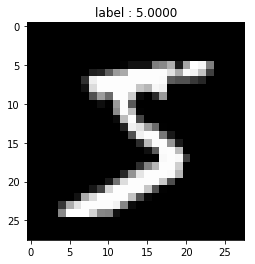

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {:.4f}'.format(y_train[index]))
plt.show()

## 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。色は理想的には連続値であり、それを特徴量とするからです。以下のコードで変換可能です。

## サンプルコード

In [7]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

## サンプルコード

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [9]:
 X_train.shape

(60000, 784)

In [10]:
y_train_one_hot.shape

(60000, 10)

[sklearn.preprocessing.OneHotEncoder — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

さらに、学習用データ6万枚の内2割を検証用データとして分割してください。学習用データが48000枚、検証用データが12000枚となります。

## サンプルコード

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


# 【問題1】ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成してください。

以下が雛形です。基本的な構成は機械学習編の線形回帰やロジスティック回帰などと同様です。

雛形

## フォワードプロパゲーション
三層のニューラルネットワークのフォワードプロパゲーションを作成します。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。



```python
batch_size = 10 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）
```

「1層目」

$A_1 = X \cdot W_1 + B_1$

### GetMiniBatchクラス

In [13]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

### ScratchSimpleNeuralNetrowkClassifierクラス

In [49]:
import numpy as np
import pandas as pd


class ScratchSimpleNeuralNetrowkClassifier():
    
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------
    self.lr = lr # 学習率
    self.sigma = sigma # ガウス分布の標準偏差
    self.batch_size = batch_size # バッチサイズ
    self.n_features = n_features # 特徴量の数
    self.n_nodes1 = n_nodes1 # 1層目のノード数
    self.n_nodes2 = n_nodes2 # 2層目のノード数
    self.n_output = n_output # 出力のクラス数（3層目のノード数）
    self.verbose = verbose　# 学習結果を表示するかを設定するフラグ

    # 損失を記録する配列を用意
    self.loss = []
    self.val_loss = []
    
    Attributes
    ----------
    self.w1_ = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
    self.w2_ = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
    self.w3_ = self.sigma * np.random.randn(self.n_nodes2, self.n_output)

    self.b1_ = self.sigma * np.random.randn(1, self.n_nodes1)
    self.b2_ = self.sigma * np.random.randn(1, self.n_nodes2)
    self.b3_ = self.sigma * np.random.randn(1, self.n_output)

    self.Z1_ = None
    self.Z2_ = None
    self.Z3_ = None
    """

    def __init__(self,lr, sigma, batch_size, n_epochs, n_features, n_nodes1, n_nodes2, n_output,\
                         activation, verbose=None):
        self.lr = lr # 学習率
        self.sigma = sigma # ガウス分布の標準偏差
        self.batch_size = batch_size # バッチサイズ
        self.n_epochs = n_epochs # エポック数
        self.n_features = n_features # 特徴量の数
        self.n_nodes1 = n_nodes1 # 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        self.activation = activation # 活性化関数を指定する文字列
        self.verbose = verbose# 学習結果を表示するかを設定するフラグ

        
        # 損失を記録する配列を用意
        self.loss = []
        self.val_loss = []
        
        self.verification_flag = None

        """
        重みとバイアスの初期化
        """
        self.w1_ = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.w2_ = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.w3_ = self.sigma * np.random.randn(self.n_nodes2, self.n_output)

        self.b1_ = self.sigma * np.random.randn(1, self.n_nodes1)
        self.b2_ = self.sigma * np.random.randn(1, self.n_nodes2)
        self.b3_ = self.sigma * np.random.randn(1, self.n_output)
        
        self.Z1_ = None
        self.Z2_ = None
        self.Z3_ = None

    
    def fit(self, X_train, y_train, X_val=None, y_val=None):
        
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # 検証データの有無を記録するフラグ
        if X_val is not None and y_val is not None:
            self.verification_flag = True
        

                
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
        
        if self.verification_flag:
            y_val_one_hot = enc.transform(y_val[:, np.newaxis])
        
#         X_train, y_train, X_val, y_val = self.prepro(X_train, y_train,\
#                                                                                  X_val, y_val)
     
        
        """
        ミニバッチ処理開始
        """
        #ミニバッチ処理を行うインスタンスを作成

        for e in range(self.n_epochs):
            num = 0
            get_mini_batch_train = GetMiniBatch(X_train, y_train_one_hot, batch_size=self.batch_size)
            
            # バッチサイズ毎にデータを取得する
            for mini_X_train, mini_y_train in get_mini_batch_train:
                num += 1

                # 順伝搬
                z_n1, a_n1, z_n2, a_n2, z_out, a_out = self.forward_prop(mini_X_train)
#                 print('z_out = {:.4f}'.format(np.mean(z_out)))
#                 print('a_out = {:.4f}'.format(np.mean(a_out)))
                
                #　逆伝搬+パラメータ更新
                self.back_prop(mini_X_train, mini_y_train, z_n1, a_n1, z_n2, a_n2, z_out, a_out)
            

#                 _, _, _, _, _, a_out = self.forward_prop(mini_X_train)
#                 loss = self.cross_entropy_error(mini_y_train, a_out)
#                 print('学習中のloss = {:.4f}'.format(loss))

            # 順伝搬
            _, _, _, _, _, a_out = self.forward_prop(X_train)
            loss1 = self.cross_entropy_error(y_train_one_hot, a_out)
            self.loss.append(loss1)
#             print('loss1 = {:.4f}'.format(loss1))

            # 検証用データの有無を判別→データが存在する場合、フラグを変更
            if self.verification_flag:
                _, _, _, _, _, a_out = self.forward_prop(X_val)
                loss2 = self.cross_entropy_error(y_val_one_hot, a_out)
                self.val_loss.append(loss2)

            if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                print('{}epoch目\n'.format(e + 1))
                print('学習用正解データとの誤差　：　{:.4f}\n'.format(loss1))

                if self.verification_flag:
                    print('検証用正解データとの誤差　：　{:.4f}\n'.format(loss2))
                print('------------------------------------------------')


    def predict(self, X_test):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        
        # 順伝搬
        _, _, _, _, _, a_out = self.forward_prop(X_test)
        
        # ソフトマックス関数の出力値(入力データがそれぞれの値である確率)から
        # 最も高い値を格納しているインデックス(0 ~ 9)を行単位(axis=1)で取り出す
        return np.argmax(a_out, axis=1)

    
    # 順伝搬
    def forward_prop(self, X):

        # 隠れ層(第1層)
        z_n1 = X @ self.w1_ + self.b1_
        # シグモイド関数で計算
        a_n1 = self.activation_func(z_n1)

        # 隠れ層(第２層)
        z_n2= a_n1 @ self.w2_ + self.b2_
        # ハイパボリックタンジェント関数で計算
        a_n2 = self.activation_func(z_n2)

        # 出力層(第３層)
        z_out = a_n2 @ self.w3_ + self.b3_
        a_out = self.softmax(z_out)
        
        return z_n1, a_n1, z_n2, a_n2, z_out, a_out
    
    
    # 誤差逆伝搬
    def back_prop(self,X , y, z_n1, a_n1, z_n2, a_n2, z_out, a_out):
        
        # 出力層(第3層)
        # ΔL/ΔA3の計算
        
        grad_z_out =  a_out - y
        grad_b_out = grad_z_out.sum(axis=0)
        grad_w_out = a_n2.T @ grad_z_out

        # 重みの更新
        self.w3_ -= self.lr * (grad_w_out / self.batch_size)
        self.b3_ -= self.lr * (grad_b_out / self.batch_size)
#         print('self.w3_ = {:.4f}'.format(self.w3_))
#         print('self.b3_ = {:.4f}'.format(self.b3_))
        
        # (隠れ層)第２層
        # ΔL/ΔA2の計算
        grad_a_n2 =  (grad_z_out @ self.w3_.T) 
#         print('grad_a_n2 = {:.4f} self.derivative_func(z_n2) = {:.4f}'.format(grad_a_n2, self.derivative_func(z_n2)))
        grad_z_n2 = grad_a_n2 * self.derivative_func(a_n2)

        grad_b_n2 = grad_z_n2.sum(axis=0)
        grad_w_n2 = a_n1.T @ grad_z_n2

                
        # 重みの更新
        self.w2_ -=  self.lr * (grad_w_n2 /self.batch_size)
        # バイアスの更新
        self.b2_ -= self.lr * (grad_b_n2 / self.batch_size)

        
        # (隠れ層)第1層
        grad_a_n1 = grad_z_n2 @ self.w2_.T
        grad_z_n1 = grad_a_n1 * self.derivative_func(a_n1)
        grad_b_n1 = grad_z_n1.sum(axis=0)
        grad_w_n1 = X.T @ grad_z_n1

        # バイアスの更新
        self.w1_ -= self.lr * (grad_w_n1 / self.batch_size)
        self.b1_ -= self.lr * (grad_b_n1 / self.batch_size)

    
    def activation_func(self, A):
        
        """
        指定の活性化関数で順伝搬する。

        Parameters
        ----------
        A : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        
        # オーバーフロー対策の為、eの乗数の最大値、最小値を設定
#         sigmoid_range = 34.538776394910684
#         A = np.clip(A, -sigmoid_range, sigmoid_range)
        
        # funcの値を確認
        # 0の場合→シグモイド関数を計算
        if self.activation == 'sig':
            # シグモイド関数を計算
            return 1.0 / (1.0 + np.exp(-A))
        
        # 1の場合→ハイポリックタンジェント関数を計算
        elif self.activation == 'tan':
            return np.tanh(A)

    
    def derivative_func(self, dZ):
        
        """
        指定の活性化関数で逆伝搬する。

        Parameters
        ----------
        A : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        # funcの値を確認
        # 0の場合→シグモイド関数を計算
        if self.activation == 'sig':
            # シグモイド関数を計算
            return (dZ * (1.0 - dZ))
        
        # 1の場合→ハイポリックタンジェント関数を計算
        elif self.activation == 'tan':
            return (1. - (np.tanh(dZ))**2)
        
    
    
    def softmax(self, A3):
        
        # 最大値を取得
        A3_max = np.max(A3, axis=1)
        
        # オーバーフロー対策の為、各値から最大値を引く
        exp_A = np.exp(A3 - A3_max.reshape(-1, 1))
        sum_exp_A = np.sum(exp_A, axis=1).reshape(-1, 1)

        # ソフトマックス関数を計算
        return exp_A / sum_exp_A
    
    
    def cross_entropy_error(self, t, y ):
#         # 計算結果がマイナス無限大となるのを防ぐ為に微小な値を作成
#         delta = 1e-7
        
#         # クロスエントロピー誤差を計算
#         return (- (np.sum(t * np.log(y + delta))))
        value1 = t * (np.log(y + 1e-05)) # ゼロ除算対策
#         value2 = (1. - t) * np.log(1. - y + 1e-05) # ゼロ除算対策
        train_cost = -np.sum(value1)
        return train_cost /t.shape[0]

    def plot_learning_curve(self):
        plt.plot(range(self.n_epochs), self.loss, label='loss')
        plt.plot(range(self.n_epochs), self.val_loss, label='val_loss')
        plt.xlabel('repeat_count')
        plt.ylabel('mse')
        plt.title('Learning curve')
        plt.legend()
        return


In [15]:
y_train.shape

(48000,)

In [16]:
X_val.shape

(12000, 784)

In [32]:
X_train.shape

(48000, 784)

In [17]:
y_val.shape

(12000,)

In [50]:
# インスタンス作成
cls = ScratchSimpleNeuralNetrowkClassifier(lr=0.01,\
                                                                           sigma=0.01, \
                                                                           batch_size=10,\
                                                                           n_epochs=100,\
                                                                           n_features=784,\
                                                                           n_nodes1=400,\
                                                                           n_nodes2=200,\
                                                                           n_output=10,\
                                                                           activation='sig',\
                                                                           verbose=True)

# cls.fit(X_train, y_train)
cls.fit(X_train, y_train, X_val, y_val)

1epoch目

学習用正解データとの誤差　：　2.3111

検証用正解データとの誤差　：　2.3122

------------------------------------------------
2epoch目

学習用正解データとの誤差　：　2.3155

検証用正解データとの誤差　：　2.3175

------------------------------------------------
3epoch目

学習用正解データとの誤差　：　2.3182

検証用正解データとの誤差　：　2.3210

------------------------------------------------
4epoch目

学習用正解データとの誤差　：　2.2063

検証用正解データとの誤差　：　2.2104

------------------------------------------------
5epoch目

学習用正解データとの誤差　：　1.4580

検証用正解データとの誤差　：　1.4635

------------------------------------------------
6epoch目

学習用正解データとの誤差　：　1.1273

検証用正解データとの誤差　：　1.1252

------------------------------------------------
7epoch目

学習用正解データとの誤差　：　0.8526

検証用正解データとの誤差　：　0.8460

------------------------------------------------
8epoch目

学習用正解データとの誤差　：　0.7207

検証用正解データとの誤差　：　0.7142

------------------------------------------------
9epoch目

学習用正解データとの誤差　：　0.6485

検証用正解データとの誤差　：　0.6409

------------------------------------------------
10epoch目

学習用正解データとの誤差　：　0.5835

検証用正解データとの誤差　：　0.5743

--------

80epoch目

学習用正解データとの誤差　：　0.0672

検証用正解データとの誤差　：　0.1054

------------------------------------------------
81epoch目

学習用正解データとの誤差　：　0.0660

検証用正解データとの誤差　：　0.1047

------------------------------------------------
82epoch目

学習用正解データとの誤差　：　0.0648

検証用正解データとの誤差　：　0.1040

------------------------------------------------
83epoch目

学習用正解データとの誤差　：　0.0636

検証用正解データとの誤差　：　0.1033

------------------------------------------------
84epoch目

学習用正解データとの誤差　：　0.0625

検証用正解データとの誤差　：　0.1027

------------------------------------------------
85epoch目

学習用正解データとの誤差　：　0.0613

検証用正解データとの誤差　：　0.1021

------------------------------------------------
86epoch目

学習用正解データとの誤差　：　0.0602

検証用正解データとの誤差　：　0.1015

------------------------------------------------
87epoch目

学習用正解データとの誤差　：　0.0592

検証用正解データとの誤差　：　0.1009

------------------------------------------------
88epoch目

学習用正解データとの誤差　：　0.0581

検証用正解データとの誤差　：　0.1003

------------------------------------------------
89epoch目

学習用正解データとの誤差　：　0.0571

検証用正解データとの誤差　：　0.0998


# 4.検証
# 【問題2】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

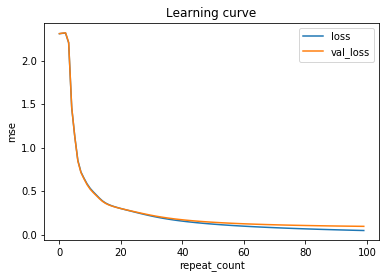

In [51]:
cls.plot_learning_curve()

## 考察
### 学習曲線がエポック数ごとに低下していることを確認し、正常に学習出来ていることを確認

# 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

## テストデータにて予測

In [44]:
y_pred = cls.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

## テストデータの正解データ

In [45]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## クラス名を格納するリストの作成

In [28]:
target_names = []
for i in range(10):
    target_names.append('class' + str(i))
target_names

['class0',
 'class1',
 'class2',
 'class3',
 'class4',
 'class5',
 'class6',
 'class7',
 'class8',
 'class9']

## 指標値の表示

In [47]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      class0       0.91      0.91      0.91       980
      class1       0.94      0.93      0.94      1135
      class2       0.88      0.82      0.85      1032
      class3       0.86      0.79      0.82      1010
      class4       0.80      0.82      0.81       982
      class5       0.72      0.73      0.72       892
      class6       0.88      0.92      0.90       958
      class7       0.83      0.88      0.86      1028
      class8       0.73      0.78      0.75       974
      class9       0.77      0.73      0.75      1009

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



## 考察
### Precision Recall F1 それぞれの指標値で最低でも70%以上となっており、高い精度で予測できていることを確認

 ### 値が低いクラスについては学習データのクラスごとの分布が影響している可能性あり